<a href="https://colab.research.google.com/github/MeetSolanki100/DeepLearning/blob/main/Ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))


GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [2]:
print(tf.__version__)

2.17.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = data.iloc[:, 3:13]
y = data.iloc[:, 13]


In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [8]:
geography = pd.get_dummies(X['Geography'], drop_first=True, dtype=int)
gender = pd.get_dummies(X['Gender'], drop_first=True, dtype=int)

In [9]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [10]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [11]:
X = pd.concat([X, geography, gender], axis=1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train


array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_train.shape

(8000, 11)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,LeakyReLU,ReLU,PReLU

In [18]:
classifier = Sequential()

### Input layer

In [19]:
classifier.add(Dense(units=11,activation='relu'))

### Hidden layer

In [20]:
classifier.add(Dense(units=7,activation='relu'))

In [21]:
classifier.add(Dense(units=6,activation='relu'))

### Output Layer

In [22]:
classifier.add(Dense(1,activation='sigmoid'))

In [24]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [25]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

### Early Stopping

In [27]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [28]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7970 - loss: 0.4606 - val_accuracy: 0.8122 - val_loss: 0.4296
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8211 - loss: 0.4131 - val_accuracy: 0.8436 - val_loss: 0.3841
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8468 - loss: 0.3769 - val_accuracy: 0.8455 - val_loss: 0.3656
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8721 - loss: 0.3380 - val_accuracy: 0.8535 - val_loss: 0.3630
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8561 - loss: 0.3449 - val_accuracy: 0.8542 - val_loss: 0.3559
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8624 - loss: 0.3420 - val_accuracy: 0.8474 - val_loss: 0.3693
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8542 - loss: 0.3475 - val_accuracy: 0.8550 - val_loss: 0.3586
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8628 - loss: 0.3327 - 

In [29]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

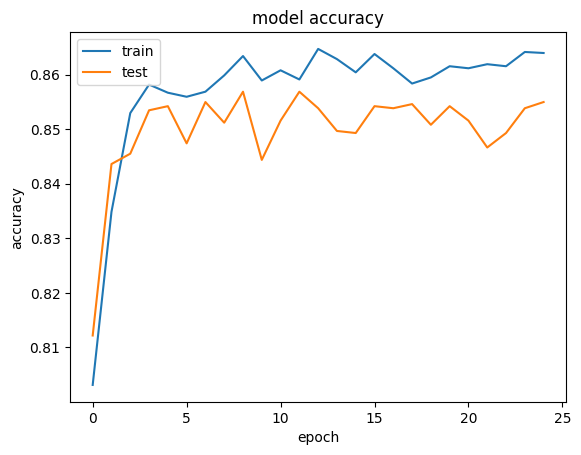

In [30]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['train','test'],loc='upper left')
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()


prediction of test data.

In [31]:
y_pred = classifier.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [32]:
y_pred = (y_pred >= 0.5)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm


array([[1486,  109],
       [ 178,  227]])

In [34]:
score = accuracy_score(y_test, y_pred)
score

0.8565

### get the weights

In [35]:
classifier.get_weights()

[array([[-4.25468117e-01, -7.37619400e-02,  9.86456454e-01,
          5.90416312e-01,  3.22030067e-01, -1.67609155e-01,
          6.49083173e-03, -1.05589914e+00, -1.43604413e-01,
          3.05406332e-01, -2.66554564e-01],
        [ 1.10233843e+00, -2.47254777e+00,  3.58505696e-01,
         -1.19196630e+00, -3.70755464e-01,  2.16499138e+00,
          9.35324132e-01, -1.88763583e+00,  2.39434075e+00,
         -6.88835859e-01, -3.43032092e-01],
        [ 1.70149133e-01, -2.78022140e-01, -6.22599758e-03,
         -7.71121830e-02, -4.33205992e-01,  2.23652154e-01,
          2.01351762e-01,  4.76604372e-01, -2.49573156e-01,
          1.34459662e+00,  5.74770533e-02],
        [-2.33932638e+00, -7.73990870e-01, -1.64888978e+00,
         -4.57462579e-01, -1.89399409e+00, -3.87246609e-01,
          1.09848924e-01, -1.23510778e+00,  6.30198359e-01,
         -1.77524996e+00, -1.30222297e+00],
        [-2.73445296e+00,  2.17845380e-01,  8.45601380e-01,
         -5.20434618e-01,  1.33383274e-01,  